In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [257]:
Final_data = pd.read_csv('preprocessed_data.csv')

In [258]:
Final_data.head()

,Age,New_Education,Marital_Status,Kids,Income,Total_amount_spent,Accepted_campaign,Number_of_purchases
0,68,0,4,0,58138.0,1617,0,25
1,71,0,4,2,46344.0,27,0,6
2,60,0,5,0,71613.0,776,0,21
3,41,0,5,1,26646.0,53,0,8
4,44,2,3,1,58293.0,422,0,19


In [259]:
Final_data.shape

(2229, 8)

#### Observation:
- Final_data has 2229 rows and 8 columns

## K-Means clustering

In [260]:
X_0 = Final_data.copy()

In [261]:
kmeans = KMeans()

In [262]:
wcss = []
silhouette_coeff = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 1)
    kmeans.fit(X_0)
    wcss.append(kmeans.inertia_)
    if k==1:
        silhouette_coeff.append(None)
    else:
        score = silhouette_score(X_0, kmeans.labels_)
        silhouette_coeff.append(score)

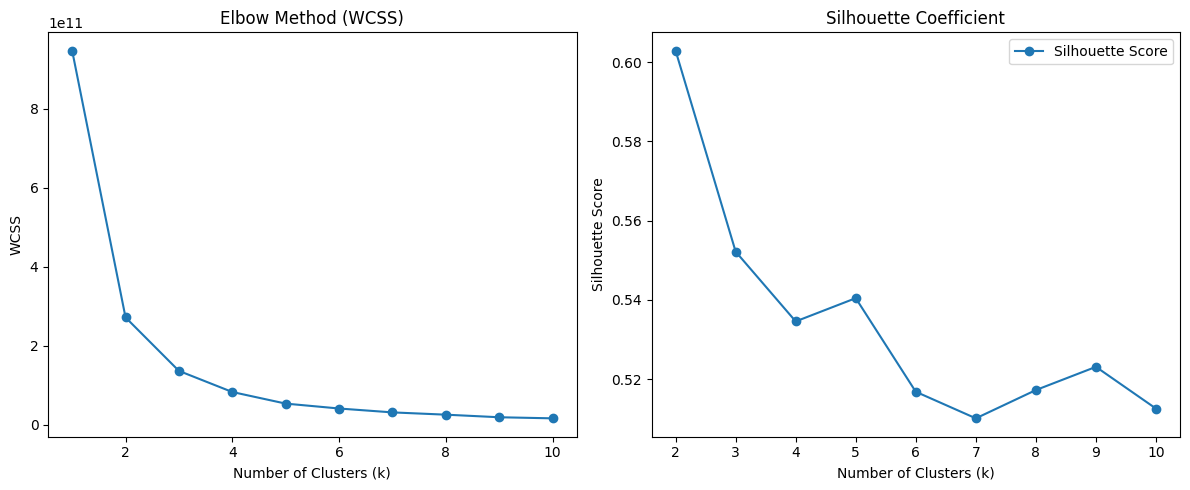

In [263]:
plt.figure(figsize=(12, 5))

# Plot WCSS
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method (WCSS)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")

# Plot Silhouette Coefficient
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_coeff[1:], marker='o', label="Silhouette Score")  # Exclude k=1
plt.title("Silhouette Coefficient")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.legend()

plt.tight_layout()
plt.show()

In [264]:
# Predicting using k-means algorithm.
kmeans = KMeans(n_clusters = 2, random_state = 1).fit(X_0)
pred = kmeans.predict(X_0)

# Appending those cluster value into main DataFrame
X_0['kmeans_cluster_pred'] = pred + 1

In [265]:
X_0.head()

,Age,New_Education,Marital_Status,Kids,Income,Total_amount_spent,Accepted_campaign,Number_of_purchases,kmeans_cluster_pred
0,68,0,4,0,58138.0,1617,0,25,1
1,71,0,4,2,46344.0,27,0,6,2
2,60,0,5,0,71613.0,776,0,21,1
3,41,0,5,1,26646.0,53,0,8,2
4,44,2,3,1,58293.0,422,0,19,1


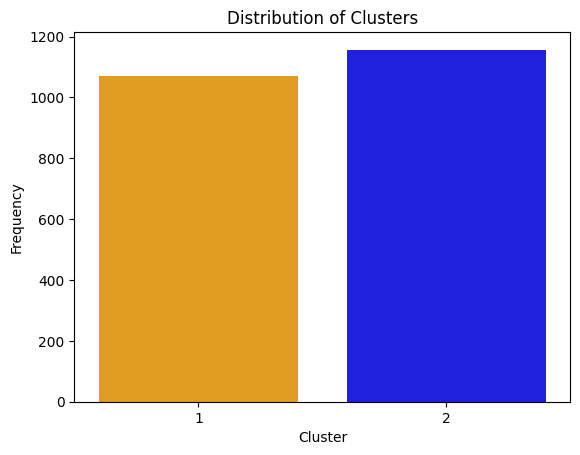

In [266]:
# Frequency of cluster
sns.countplot(x = X_0['kmeans_cluster_pred'], palette = ['orange','blue'])
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

#### Observations:
- cluster 2 have more members

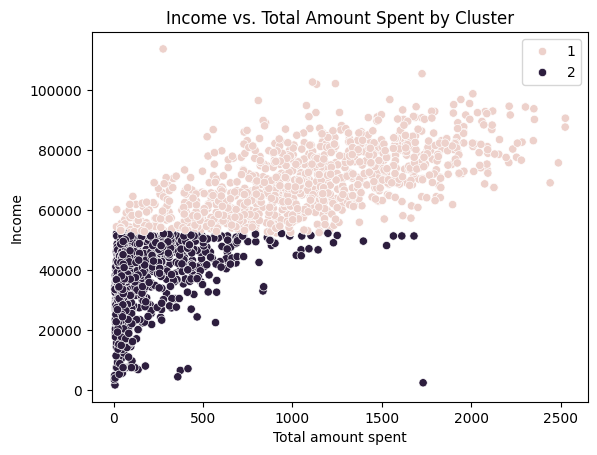

In [267]:
sns.scatterplot(x = X_0['Total_amount_spent'],y = X_0['Income'],hue=X_0['kmeans_cluster_pred'])
plt.legend(loc='upper right')
plt.xlabel('Total amount spent')
plt.ylabel('Income')
plt.title('Income vs. Total Amount Spent by Cluster')
plt.show()

## PCA

In [268]:
pca = PCA(n_components = 3)
pca.fit(X_0)
PCA_ds = pd.DataFrame(pca.transform(X_0), columns = (['col1','col2','col3']))

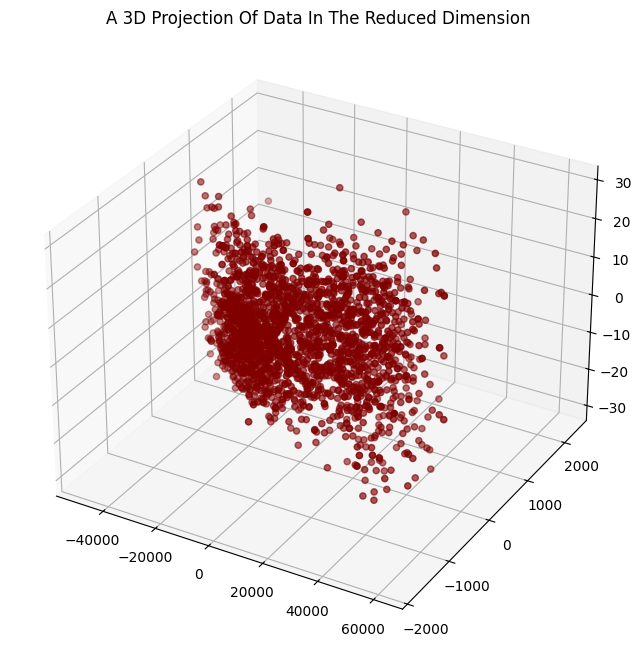

In [269]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")

plt.show()

## KMeans with PCA

In [270]:
wcss = []
silhouette_coeff = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 1)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)
    if k==1:
        silhouette_coeff.append(None)
    else:
        score = silhouette_score(PCA_ds, kmeans.labels_)
        silhouette_coeff.append(score)

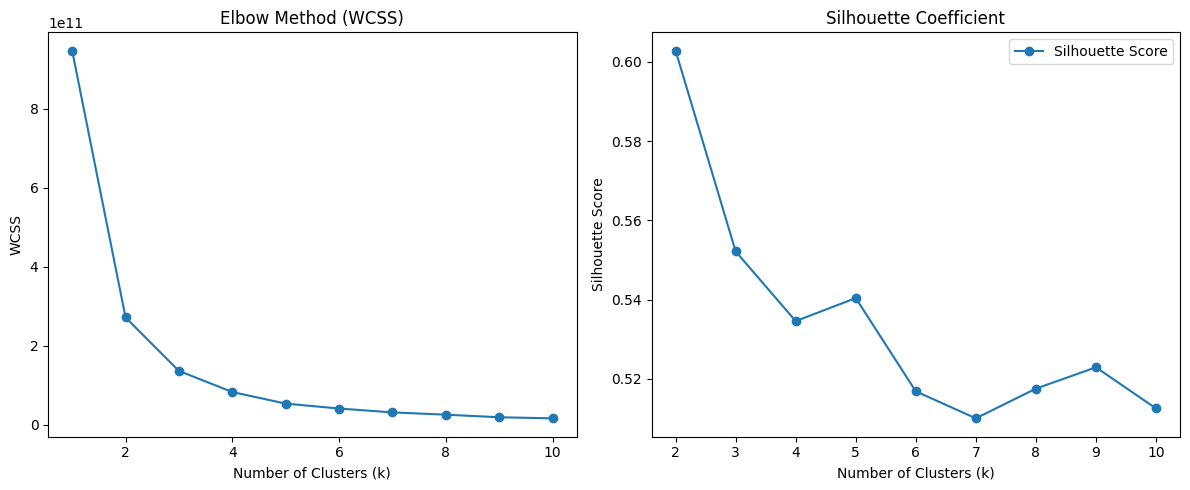

In [271]:
plt.figure(figsize=(12, 5))

# Plot WCSS
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method (WCSS)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")

# Plot Silhouette Coefficient
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_coeff[1:], marker='o', label="Silhouette Score")  
plt.title("Silhouette Coefficient")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.legend()

plt.tight_layout()
plt.show()

## Agglomerative Clustering with PCA

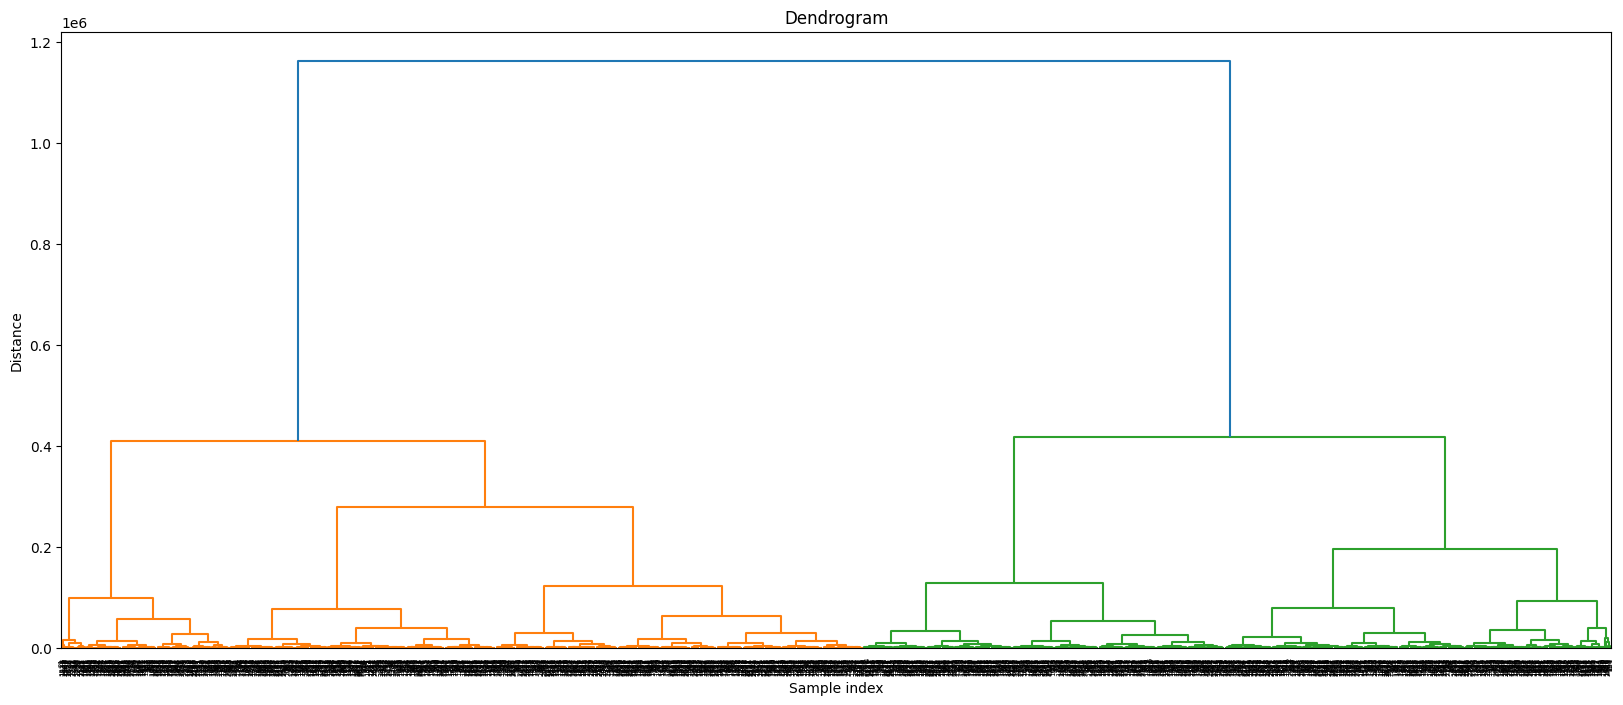

In [272]:
plt.figure(figsize = (20,8))
dendrogram(linkage(PCA_ds, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

#### Observation:
- From Dendrogram, we can take k = 2

In [273]:
agglo = AgglomerativeClustering(n_clusters=2, linkage = "ward")
agglo.fit(PCA_ds)
score = silhouette_score(PCA_ds, agglo.labels_)
round(score, 4)

np.float64(0.6027)

In [274]:
pred = agglo.fit_predict(PCA_ds)
X_0['Agglo_cluster_pred'] = pred+1

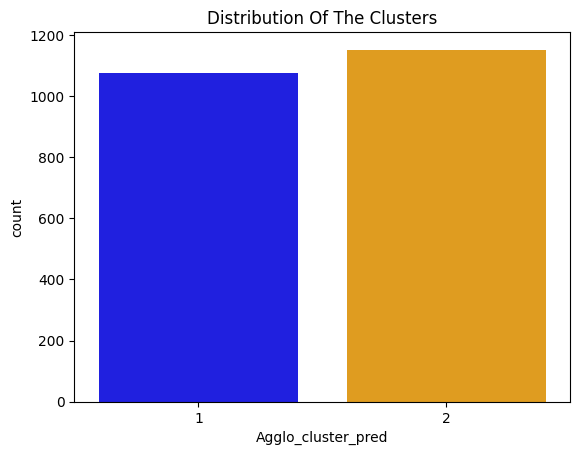

In [275]:
sns.countplot(x=X_0['Agglo_cluster_pred'], palette = ['orange','blue'])
plt.title("Distribution Of The Clusters")
plt.show()

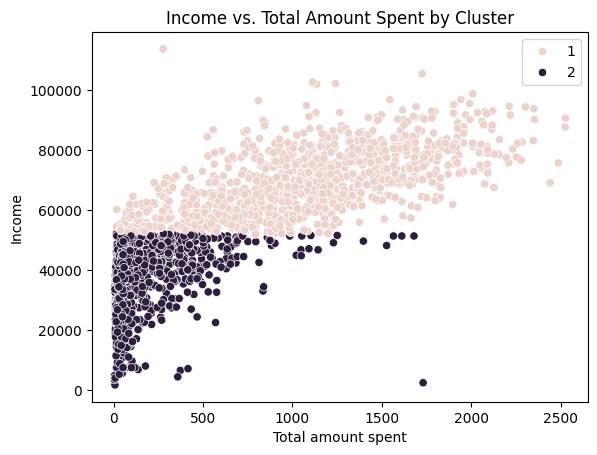

In [276]:
sns.scatterplot(y = X_0['Income'], x = X_0['Total_amount_spent'], hue = X_0['Agglo_cluster_pred'])
plt.legend(loc='upper right')
plt.xlabel('Total amount spent')
plt.ylabel('Income')
plt.title('Income vs. Total Amount Spent by Cluster')
plt.show()

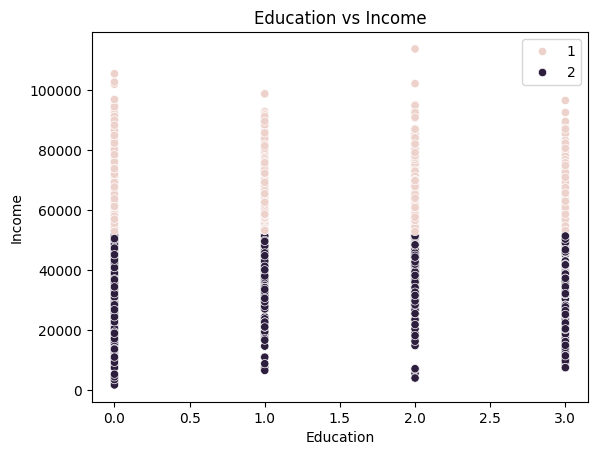

In [277]:
sns.scatterplot(x = X_0['New_Education'], y = X_0['Income'], hue = X_0['Agglo_cluster_pred'])
plt.legend(loc='upper right')
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Education vs Income')
plt.show()

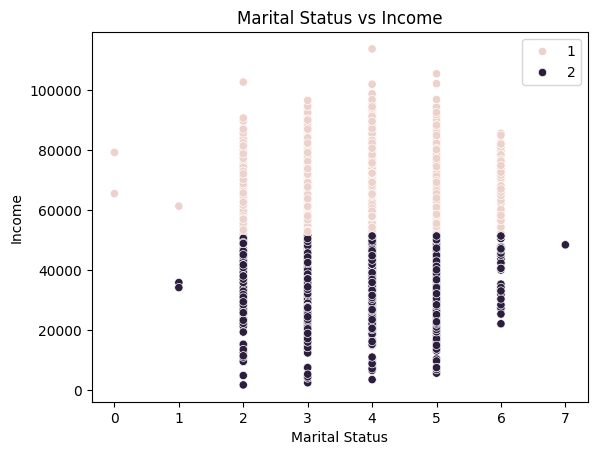

In [278]:
sns.scatterplot(x = X_0['Marital_Status'], y = X_0['Income'], hue = X_0['Agglo_cluster_pred'])
plt.legend(loc='upper right')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.title('Marital Status vs Income')
plt.show()

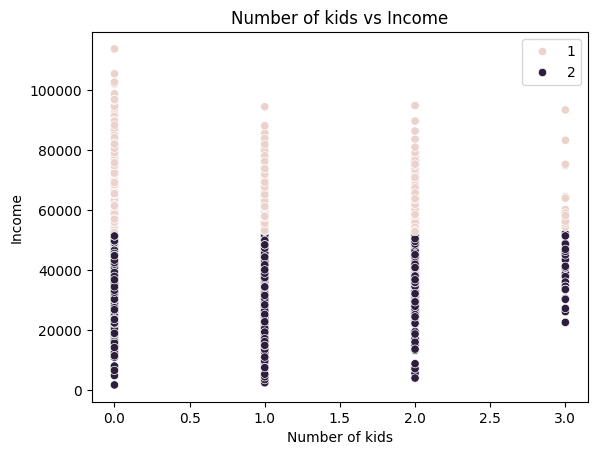

In [279]:
sns.scatterplot(x = X_0['Kids'], y = X_0['Income'], hue = X_0['Agglo_cluster_pred'])
plt.legend(loc='upper right')
plt.xlabel('Number of kids')
plt.ylabel('Income')
plt.title('Number of kids vs Income')
plt.show()

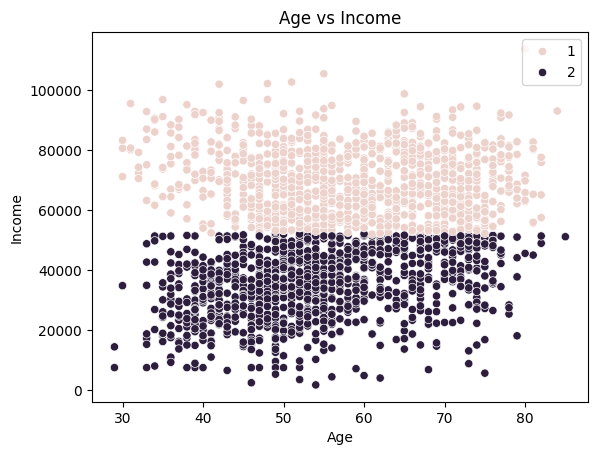

In [280]:
sns.scatterplot(x = X_0['Age'], y = X_0['Income'], hue = X_0['Agglo_cluster_pred'])
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.show()

# Conclusions

- Cluster 1: Represents customers with lower income and lower spending. This group may consist of price-sensitive or budget-conscious customers.
- Cluster 2: Represents customers with higher income and higher spending. This group may include premium or high-value customers.

### Targeting Strategy:
- Cluster 1 can be targeted with discounts and budget-friendly products.
- Cluster 2 can be targeted with premium products and loyalty programs.
